# Importing Libraries and Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [49]:
# Define path

path = r'/Users/jacob/Desktop/Achievement 6'

In [50]:
# Import the data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_result.csv'), index_col = False)

In [51]:
df.head()

,state,date,cases,deaths,population_x,population_y
0,Alabama,2020-12-31,1238828,19369,4864680,4864680
1,Alabama,2021-12-31,7746822,147830,4864680,4864680
2,Alabama,2022-12-31,16844768,235895,4864680,4864680
3,Alaska,2020-12-31,115111,549,738516,738516
4,Alaska,2021-12-31,1093032,5889,738516,738516


In [52]:
# Reset Index
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1

In [53]:
# Dropping "population_y" Column
df = df.drop('population_y', axis=1)

In [54]:
# Rename columns
df.rename(columns={'population_x': 'population'}, inplace=True)


In [55]:
df.head()

,state,date,cases,deaths,population
1,Alabama,2020-12-31,1238828,19369,4864680
2,Alabama,2021-12-31,7746822,147830,4864680
3,Alabama,2022-12-31,16844768,235895,4864680
4,Alaska,2020-12-31,115111,549,738516
5,Alaska,2021-12-31,1093032,5889,738516


In [56]:
# Filtrar las filas con la fecha '2020-12-31'
df = df.loc[df['date'] == '2020-12-31']


In [57]:
df

,state,date,cases,deaths,population
1,Alabama,2020-12-31,1238828,19369,4864680
4,Alaska,2020-12-31,115111,549,738516
7,Arizona,2020-12-31,1795431,38729,6946685
10,Arkansas,2020-12-31,701049,11191,2445609
13,California,2020-12-31,7039544,112734,38775903
16,Colorado,2020-12-31,1033612,22865,4877112
19,Connecticut,2020-12-31,651003,39620,3581504
22,Delaware,2020-12-31,195469,5758,949495
25,District of Columbia,2020-12-31,133191,5181,684498
28,Florida,2020-12-31,5163326,96687,16264840


In [58]:
# Reset Index
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1
df

,state,date,cases,deaths,population
1,Alabama,2020-12-31,1238828,19369,4864680
2,Alaska,2020-12-31,115111,549,738516
3,Arizona,2020-12-31,1795431,38729,6946685
4,Arkansas,2020-12-31,701049,11191,2445609
5,California,2020-12-31,7039544,112734,38775903
6,Colorado,2020-12-31,1033612,22865,4877112
7,Connecticut,2020-12-31,651003,39620,3581504
8,Delaware,2020-12-31,195469,5758,949495
9,District of Columbia,2020-12-31,133191,5181,684498
10,Florida,2020-12-31,5163326,96687,16264840


In [60]:
# Crear un nuevo DataFrame con la columna "State"
df_state = df[["state"]].copy()

# Imprimir el nuevo DataFrame
print(df_state)



                   state
1                Alabama
2                 Alaska
3                Arizona
4               Arkansas
5             California
6               Colorado
7            Connecticut
8               Delaware
9   District of Columbia
10               Florida
11               Georgia
12                Hawaii
13                 Idaho
14              Illinois
15               Indiana
16                  Iowa
17                Kansas
18              Kentucky
19             Louisiana
20                 Maine
21              Maryland
22         Massachusetts
23              Michigan
24             Minnesota
25           Mississippi
26              Missouri
27               Montana
28              Nebraska
29                Nevada
30         New Hampshire
31            New Jersey
32            New Mexico
33              New York
34        North Carolina
35          North Dakota
36                  Ohio
37              Oklahoma
38                Oregon
39          Pennsylvania


In [61]:
df

,state,date,cases,deaths,population
1,Alabama,2020-12-31,1238828,19369,4864680
2,Alaska,2020-12-31,115111,549,738516
3,Arizona,2020-12-31,1795431,38729,6946685
4,Arkansas,2020-12-31,701049,11191,2445609
5,California,2020-12-31,7039544,112734,38775903
6,Colorado,2020-12-31,1033612,22865,4877112
7,Connecticut,2020-12-31,651003,39620,3581504
8,Delaware,2020-12-31,195469,5758,949495
9,District of Columbia,2020-12-31,133191,5181,684498
10,Florida,2020-12-31,5163326,96687,16264840


In [63]:

df = df.drop(columns=["state"])


In [15]:
#check for duplicates 
df_dups = df[df.duplicated()] 
df_dups
#no duplicates 

,state,date,cases,deaths,population


In [16]:
#check for missing values 
df.isnull().sum()
#no missign values

state         0
date          0
cases         0
deaths        0
population    0
dtype: int64

In [17]:
# Dividing the column 'date' en 'month' and 'year' and adding this new columns to the dataframe
df['month'] = df['date'].str.split('-').str[1]  # month
df['year'] = df['date'].str.split('-').str[0]   # year

/var/folders/5j/49cjqn4n79n3w8yw5rj_8hhh0000gn/T/ipykernel_24124/4189498663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].str.split('-').str[1]  # month
/var/folders/5j/49cjqn4n79n3w8yw5rj_8hhh0000gn/T/ipykernel_24124/4189498663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].str.split('-').str[0]   # year


In [64]:
df.head()

,date,cases,deaths,population
1,2020-12-31,1238828,19369,4864680
2,2020-12-31,115111,549,738516
3,2020-12-31,1795431,38729,6946685
4,2020-12-31,701049,11191,2445609
5,2020-12-31,7039544,112734,38775903


In [65]:
# Remove categorical columns
df = df.drop(columns = ['date'])

## The new dataframe contains the total Cases and Deaths per state for 2020

# 3. The elbow technique 

In [66]:
# Defining a range of potential numbers of clusters in the data 
# Choosing 1-10 like in the Exercise
num_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

In [67]:
# After applying range, then apply k-means algorithm 
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
# This will output a list of scores 

/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [68]:
# List score
score

[-1897032510393347.0,
 -630593762446493.9,
 -240176342733373.56,
 -75071645210412.67,
 -46609808624038.19,
 -34161166838078.617,
 -23145905522913.14,
 -18765854544436.414,
 -14652175671792.498]

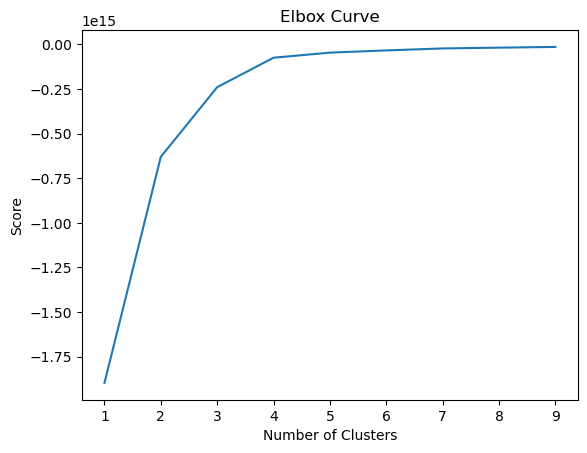

In [69]:
#plot the elbow curve 
pl.plot(num_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbox Curve')
pl.show()

# 4. Run the k-means algorithm 

In [70]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4)

In [71]:
# Fit kmeans object to dataframe 
kmeans.fit(df)

/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

# 6. Attach a new column to your dataframe with the resulting clusters. This will allow usto create a visualization using your clusters.

In [72]:
# Create column in dataframe with values corresponding to clusters 
df['clusters'] = kmeans.fit_predict(df)

/Users/jacob/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [73]:
# Check the dataframe to see the new column 
df.head(5)

,cases,deaths,population,clusters
1,1238828,19369,4864680,0
2,115111,549,738516,3
3,1795431,38729,6946685,0
4,701049,11191,2445609,3
5,7039544,112734,38775903,1


In [74]:
# Count the clusers 
df['clusters'].value_counts()

clusters
3    31
0    17
2     3
1     1
Name: count, dtype: int64

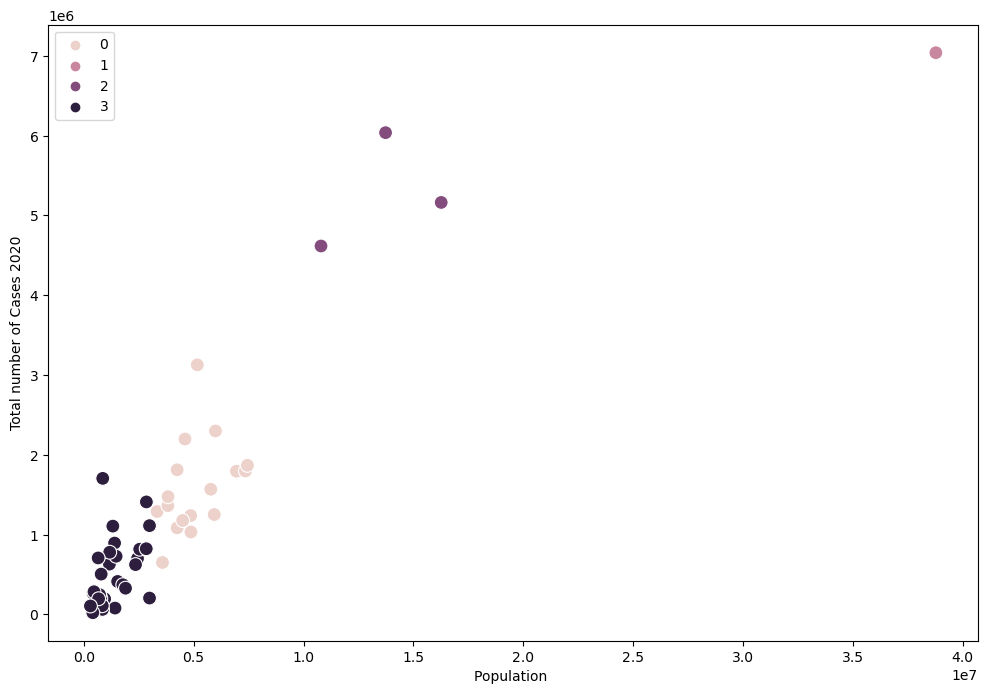

In [75]:
#plot population vs cases 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['population'], y=df['cases'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population ') # Label x-axis.
plt.ylabel('Total number of Cases 2020') # Label y-axis.
plt.show()

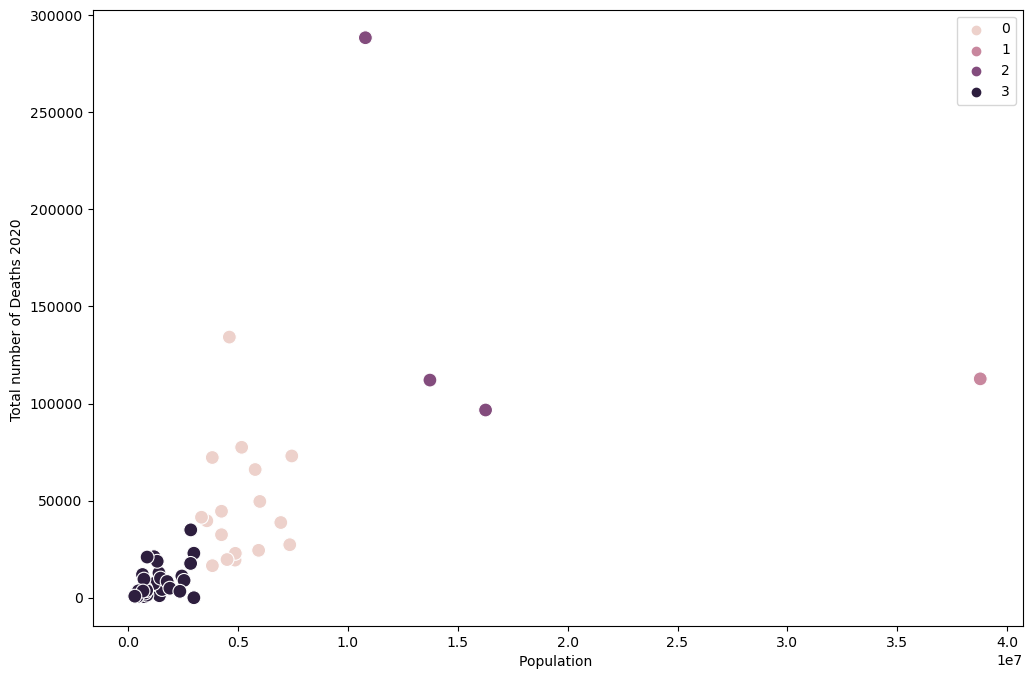

In [76]:
#plot population vs deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['population'], y=df['deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population ') # Label x-axis.
plt.ylabel('Total number of Deaths 2020 ') # Label y-axis.
plt.show()

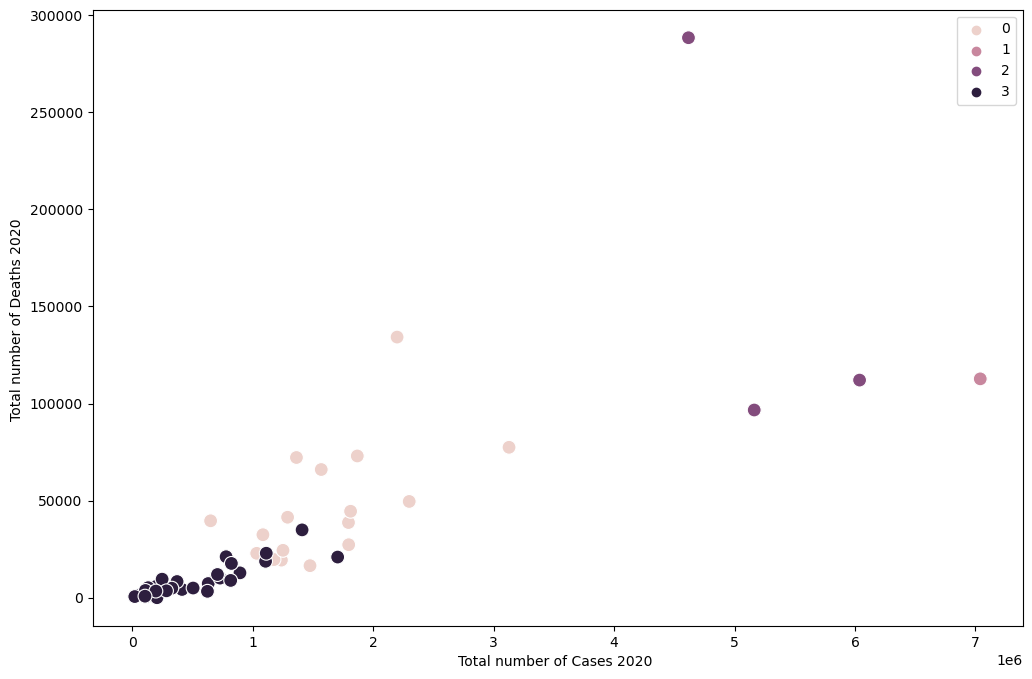

In [77]:
#plot cases vs deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['cases'], y=df['deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total number of Cases 2020 ') # Label x-axis.
plt.ylabel('Total number of Deaths 2020 ') # Label y-axis.
plt.show()

# 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
There are 4 distinct clusters that were selected from the elbow technique. The first group (0) are mostly states with small populations and low cases and deaths. The second group (3) consist of states with populations around 1 million with total cases less than 300 thousand and total deaths less than 100 thousand. The third group (2) consist of states with populations around 2 millions. This group has around 600 thousand cases and around 100 deaths. The third group (1) only has one observation. This state has the largest population of around 10,000,000. It has around 700 thousand total cases and 150 thousand recorded deaths. This data makes sense as there are a wide range of population sizes in America. Some States are very small while others can have millions of residents. 

# 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [78]:
#create a column that renames the clusters to colors 
df.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [79]:
df.groupby('cluster').agg({
    'population':['mean','median'],
    'cases':['mean','median'],
    'deaths':['mean','median']
})

population                     cases                    deaths  \
                     mean      median          mean     median           mean   
cluster                                                                         
black        1.366163e+06   1166700.0  5.128437e+05   372615.0    8571.677419   
dark purple  1.359789e+07  13732964.0  5.272882e+06  5163326.0  165741.666667   
pink         5.091115e+06   4864680.0  1.590458e+06  1476182.0   47029.058824   
purple       3.877590e+07  38775903.0  7.039544e+06  7039544.0  112734.000000   

                       
               median  
cluster                
black          5181.0  
dark purple  112100.0  
pink          39620.0  
purple       112734.0

In [80]:
df_cluster = df.copy()

In [87]:
df_cluster1 = df.merge(df_state, left_index=True, right_index=True)
df_cluster1

,cases,deaths,population,clusters,cluster,state
1,1238828,19369,4864680,0,pink,Alabama
2,115111,549,738516,3,black,Alaska
3,1795431,38729,6946685,0,pink,Arizona
4,701049,11191,2445609,3,black,Arkansas
5,7039544,112734,38775903,1,purple,California
6,1033612,22865,4877112,0,pink,Colorado
7,651003,39620,3581504,0,pink,Connecticut
8,195469,5758,949495,3,black,Delaware
9,133191,5181,684498,3,black,District of Columbia
10,5163326,96687,16264840,2,dark purple,Florida


In [88]:
# Exporting dataframe
df_cluster1.to_csv(os.path.join(path,'02 Data', 'Prepared Data','df_cluster1.csv'))